# PRÉDICTION DES PRIX DES VOITURES D'OCCASION AU MAROC

# INTRODUCTION 

<div style="text-align: justify ">Lorsqu'il s'agit d'acheter une voiture d'occasion, le budget est l'une des principales contraintes. Les prix peuvent varier en fonction de divers facteurs, et l'expérience client est très différente de l'achat d'un véhicule neuf. Le processus de recherche est la première étape, et l'acheteur a accès à une mine d'informations et d'avis sur Internet. Cela dit, il n'y a pratiquement aucun moyen de savoir si une offre est juste ou surévaluée. En pratique, une expérience préalable et une recherche approfondie peuvent aider.</div>

<div style="text-align: justify">
<strong>Pourquoi ne pas utiliser l'apprentissage automatique et l'analyse des données pour simplifier le processus et fournir des conseils impartiaux à l'acheteur ?<strong>
</div>

# MÉTHODOLOGIE

<img src="imgs/Méthodologie.PNG" >

# IMPORTATION DES BIBLIOTHÈQUES

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
palette = "mako"

import pickle

# IMPORTATION DES DONNÉES

## Description du jeu de données

Les données ont été collectées et extraites d'un site Web de vente de voitures au **Maroc** appelé **Mouteur.com**, utilisant la bibliothèque python **BeautifulSoup** et à travers de multiples exécutions et irritations, **29 886 lignes** de données avec **17 variables** ont été collectées avec succès à partir du site Web.

### Les données brutes:

- **Name :** Le nom de la voiture***(Object)*** <BR>
- **Kilométrage :** Le kilométrage de la voiture. ***(Int)***<BR>
- **Année :** Année de fabrication. ***(Int)***<BR>
- **Boite de vitesses :**  Le type de voiture (Automatique ou Manuelle). ***(Object)***<BR>
- **Carburant	 :** Le type de carburant de la voiture, qu'il s'agisse d'essence, diesel ou autre. ***(Object)***<BR>
- **Date :** Date d’annonce sur le site. ***(Date)***<BR>
- **Puissance fiscale :** Unité administrative calculée, en partie, à partir de la puissance réelle du moteur. ***(Int)***<BR>
- **Nombre de portes :** Nombre de portes de la voiture. ***(Int)***<BR>
- **Première main :** Acheter directement de la source originale. ***(Object-Oui/Non)***<BR> 
- **Voiture personnalisée (tuning) :** La voiture a été modifie pour l'optimiser en fonction d'un ensemble d'exigences de performance différentes de celles pour lesquelles elle a été conçue à l'origine. ***(Object-Oui/Non)*** <BR>
- **Véhicule dédouané :** Véhicule dédouané ou non. ***(Object-Oui/Non)*** <BR>
- **Véhicule en garantie :** Véhicule en garantie ou non.***(Object-Oui/Non)***<BR>
- **Importé neuf :** Importé de l'extérieur du pays à l'état neuf.***(Object-Oui/Non)*** <BR>
- **Couleur :** Couleur de la voiture ***(Object)***<BR>
- **Carrosserie :** Il indique le type de voiture, par exemple une voiture "Suv et 4x4"ou une autre catégorie. ***(Object)***<BR>
- **Options :** List des options du voiture. ***(List Of Objects)***<BR>
- **Prix :** Le prix de voiture. ***(Int)***<BR>

## Lire l’ensemble de données

In [2]:
df = pd.read_csv("data/cars_data.csv", encoding='latin1')

In [3]:
df.head()

,Nom,Kilométrage,Année,Boite de vitesses,Carburant,Date,Puissance fiscale,Nombre de portes,Première main,Voiture personnalisée (tuning),Véhicule dédouané,Véhicule en garantie,Importé neuf,Couleur,Carrosserie,Options,Prix
0,HYUNDAI Creta,85 100,2016,Manuelle,Diesel,20-05-2022,6.0,5.0,Oui,NaN,NaN,NaN,NaN,Marron clair,Suv et 4x4,"['Dvd / cd / mp3', 'Jantes aluminium', 'Airbag...",160 000 Dhs
1,FORD Explorer,52 654,2014,Automatique,Essence,17-05-2022,20.0,5.0,NaN,NaN,NaN,NaN,NaN,Noir,Suv et 4x4,"['Jantes aluminium', 'Airbags', 'Climatisation...",245 000 Dhs
2,FORD Fusion,52 387,2017,Manuelle,Diesel,20-05-2022,8.0,5.0,Oui,NaN,NaN,6 Mois,NaN,Noir,Berline,"['Jantes aluminium', 'Airbags', 'Climatisation...",165 000 Dhs
3,AUDI A4,130 529,2017,Automatique,Diesel,20-05-2022,8.0,4.0,Oui,NaN,NaN,NaN,NaN,Noir,Berline,"['Jantes aluminium', 'Airbags', 'Climatisation...",268 000 Dhs
4,FORD Fusion,137 481,2016,Automatique,Diesel,20-05-2022,8.0,5.0,Oui,NaN,NaN,NaN,NaN,Noir,Berline,"['Airbags', 'Climatisation auto', 'Abs', 'Syst...",205 000 Dhs


In [4]:
df.shape

(32333, 17)

## Avoir une idée de l'ensemble des données

In [5]:
df.describe(include=[np.number], percentiles=[.5]).transpose()

,count,mean,std,min,50%,max
Année,32333.0,2009.895277,7.189822,1940.0,2011.0,2022.0
Puissance fiscale,29611.0,7.572861,2.459998,2.0,7.0,60.0
Nombre de portes,27712.0,4.708899,0.671539,2.0,5.0,10.0
Véhicule dédouané,5322.0,2009.567456,7.529685,1954.0,2010.0,2022.0


In [6]:
df.describe(include=[np.object]).transpose()

,count,unique,top,freq
Nom,32333,717,MERCEDES Classe c,1071
Kilométrage,28662,3134,200 000,1227
Boite de vitesses,32328,2,Manuelle,24505
Carburant,32333,4,Diesel,26647
Date,32333,1158,19-05-2022,125
Première main,10664,1,Oui,10664
Voiture personnalisée (tuning),6442,1,Oui,6442
Véhicule en garantie,4090,99,1 Mois,887
Importé neuf,1586,1,Oui,1586
Couleur,30208,27,Noir,9079


In [7]:
print("le nombre des données dupliquées est :", df.duplicated().sum())

le nombre des données dupliquées est : 78


Nous **remarquons** que :<br>
- Le **nom** est sous la forme de *(marque + modèle)* et ne contient pas de valeurs manquantes. <br>
- Le **kilométrage** et le **prix** ont un format incorrect *(catégorique)*. <br>
- la **date** *(Date de parution de l'annonce)* est une colonne inutile pour notre problème. <br>
- les colonnes **Première main**, **Voiture personnalisée (tuning)**, **Véhicule dédouané**, **Véhicule en garantie** et **Importé neuf** contient de nombreuses valeurs manquantes ***(plus de 70%)***.
- les colonnes **Première main**, **Voiture personnalisée (tuning)** et **Importé neuf** n'a qu'une seule valeur que **'Oui'** (mais les valeurs manquantes de ces colonnes signifient en fait **'Non'**).
- L'ensemble de données contient quelques échantillons qui contiennent des valeurs nulles ou manquantes dans certaines colonnes.
- il y a **78** lignes **en double**.

# Nettoyage des données

- ## Création de nouvelles colonnes dérivées

Le nom de la voiture est sous la forme de **("Marque" & "Model")**, Nous pouvons alors diviser la colonne en deux colonnes.

In [8]:
# Nom est sous la form de (Marque + Model)

# Marque (le premier mot)
Marque = df['Nom'].str.split(' ').str[0]
df.insert(1,"Marque",Marque)

# Model
Model = df['Nom'].str.split(' ').str[1:].str.join(" ")
df.insert(2,"Model",Model)

# drop Nom
df.drop(['Nom'],axis=1,inplace=True)

- ## Traiter les formats incorrects

Supprimer la partie **non numérique** des attributs **numériques** :

In [9]:
# Kilométrage est sous la forme : 'XXX XXX' (object)
# Prix est sous la forme : 'XXX XXX Dhs' (object)

df["Kilométrage"] = df["Kilométrage"].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df["Prix"] = df["Prix"].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [10]:
# pour les 3 colonnes suivant les valeurs null signifie : "Non"
df["Première main"].fillna("Non", inplace=True)
df["Voiture personnalisée (tuning)"].fillna("Non", inplace=True)
df["Importé neuf"].fillna("Non", inplace=True)

In [11]:
# Pour les deux colonnes Véhicule en garantie et Véhicule dédouané, nous remplirons 
# les valeurs nulles des deux colonnes avec 'Non' et remplacer les valeurs non nulles avec 'Oui'..
df["Véhicule dédouané"] = df["Véhicule dédouané"].apply(lambda x: "Oui" if pd.notna(x) else "Non")
df["Véhicule en garantie"] = df["Véhicule en garantie"].apply(lambda x: "Oui" if pd.notna(x) else "Non")

-  ## Supprimer les colonnes inutiles

In [12]:
# Supprimer le colonne "Date" : date de publication (2020 - 2022)

df.drop("Date", axis=1, inplace=True)

- ## Nettoyage des données en double

In [13]:
# Supprimer les doublons

df.drop_duplicates(inplace=True)

-  ## Traitement des valeurs manquantes

In [14]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valeurs Manquantes', 1 : '% des valeurs totales'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% des valeurs totales', ascending=False).round(1)

    return mis_val_table_ren_columns

In [15]:
# Afficher le nombre de valeurs manquantes dans l'ensemble de données et leur pourcentage.

missing_values_table(df)

,Valeurs Manquantes,% des valeurs totales
Options,9334,29.0
Nombre de portes,4599,14.3
Kilométrage,3653,11.4
Puissance fiscale,2711,8.4
Couleur,2089,6.5
Carrosserie,574,1.8
Boite de vitesses,5,0.0


In [16]:
# Kilométrage
df['Kilométrage'].fillna(df.groupby('Année')['Kilométrage'].transform('mean'), inplace=True)
df['Kilométrage'].fillna(df['Kilométrage'].mean(), inplace=True)

# Couleur
df['Couleur'].fillna(method="ffill", inplace=True)

# Puissance fiscale et Nombre de portes
num_cols = ["Puissance fiscale", "Nombre de portes"]

for col in num_cols:
    df[col].fillna(df.groupby(['Marque','Model'])[col].transform('mean'), inplace=True)
    df[col].fillna(df[col].mean(),inplace=True)

# Carrosserie, Boite de vitesses et Options 
cat_cols = ["Carrosserie", "Boite de vitesses", "Options"]

for col in cat_cols:
    df[col].fillna(df.groupby(['Marque','Model'])[col].apply(lambda x: x.ffill().bfill()), inplace=True)
    df[col].fillna(method="ffill", inplace=True)

# Analyse exploratoire des données

- ## Visualiser les variables numériques :

<AxesSubplot: xlabel='Nombre de portes'>

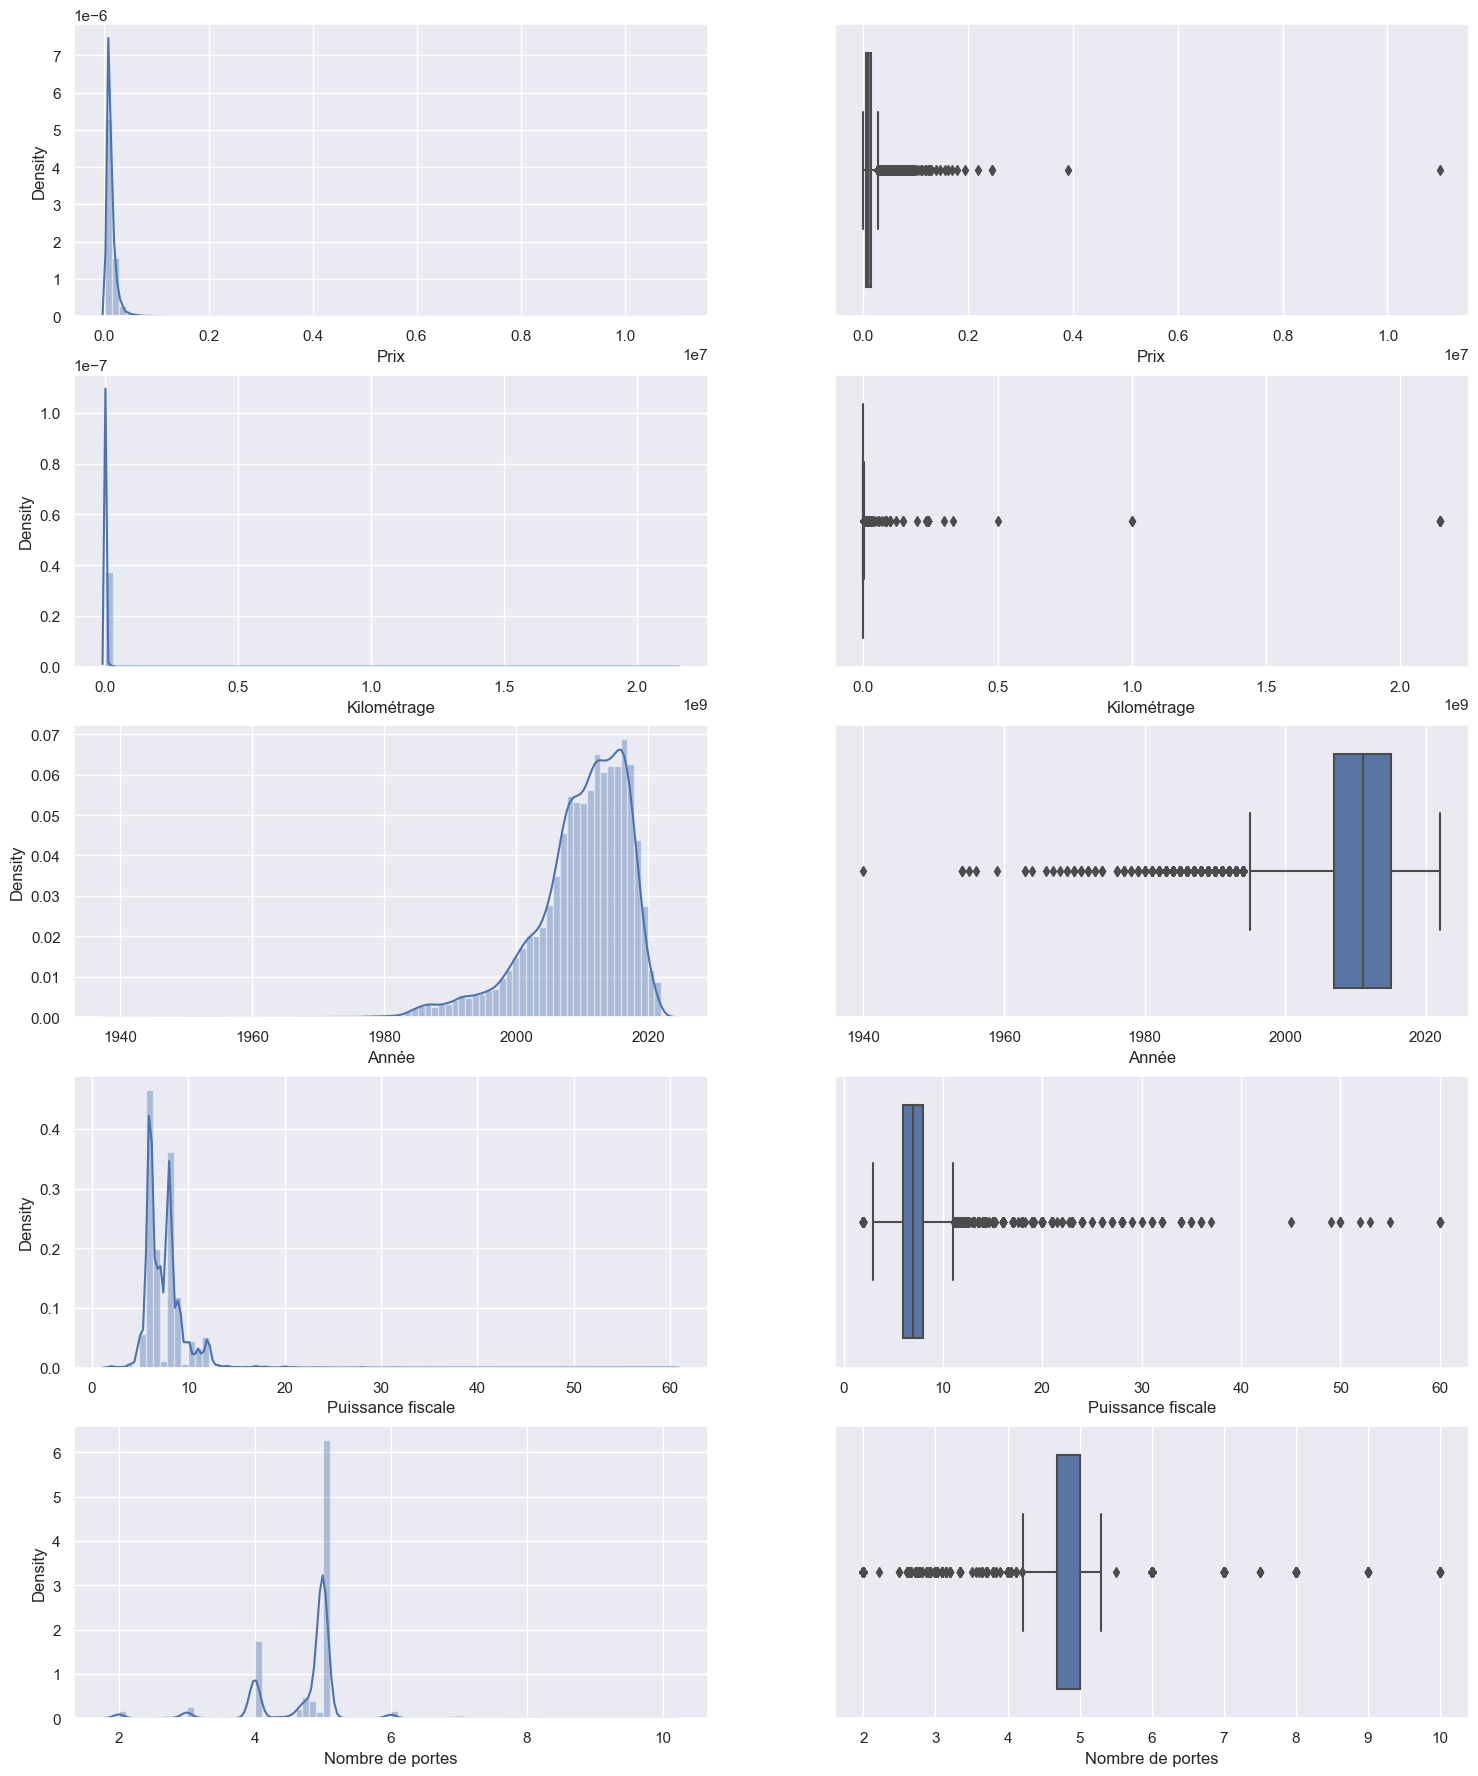

In [17]:
plt.figure(figsize=[18,22])

plt.subplot(5,2,1)
sns.distplot(df['Prix'], bins=80)
plt.subplot(5,2,2)
sns.boxplot(df['Prix'])
plt.subplot(5,2,3)
sns.distplot(df['Kilométrage'], bins=80)
plt.subplot(5,2,4)
sns.boxplot(df['Kilométrage'])
plt.subplot(5,2,5)
sns.distplot(df['Année'], bins=80)
plt.subplot(5,2,6)
sns.boxplot(df['Année'])
plt.subplot(5,2,7)
sns.distplot(df['Puissance fiscale'], bins=80)
plt.subplot(5,2,8)
sns.boxplot(df['Puissance fiscale'])
plt.subplot(5,2,9)
sns.distplot(df['Nombre de portes'], bins=80)
plt.subplot(5,2,10)
sns.boxplot(df['Nombre de portes'])

Nous pouvons voir sur les figures ci-dessus que il ya des valeurs **aberrantes** **(Outiers)** dans les deux colonnes ***(Kilométrage et Prix)***.

- ## Filtrer les données aberrantes (outliers)

- ### Kilométrage ***(IQR method)***

Pour la colonne **Kilométrage** nous utiliserons la méthode ***IQR*** pour détecter les valeurs **aberrantes**.

<img src="imgs/outliers.PNG" >

In [18]:
def find_outliers_limit(df,col):
    #removing outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    
    # calculate the outlier cutoff
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
    
    return lower,upper

def remove_outlier(df, col, upper, lower):
    # remove outliers
    df = df.loc[(df[col] > lower) & (df[col] < upper)]

    return df

lower, upper = find_outliers_limit(df, "Kilométrage")
df = remove_outlier(df, "Kilométrage", upper, lower)

- ### Prix

Pour le **Prix**, nous traiterons les valeurs aberrantes manuellement ***(sauvegarder les voitures avec un prix inférieur à 1M DH)***.

In [19]:
# Retirer les voitures de plus d'un millions de dirhams

df = df.loc[(df["Prix"] < 1000000)]

### Après avoir retiré les valeurs aberrantes **(Outliers)**

<AxesSubplot: xlabel='Kilométrage'>

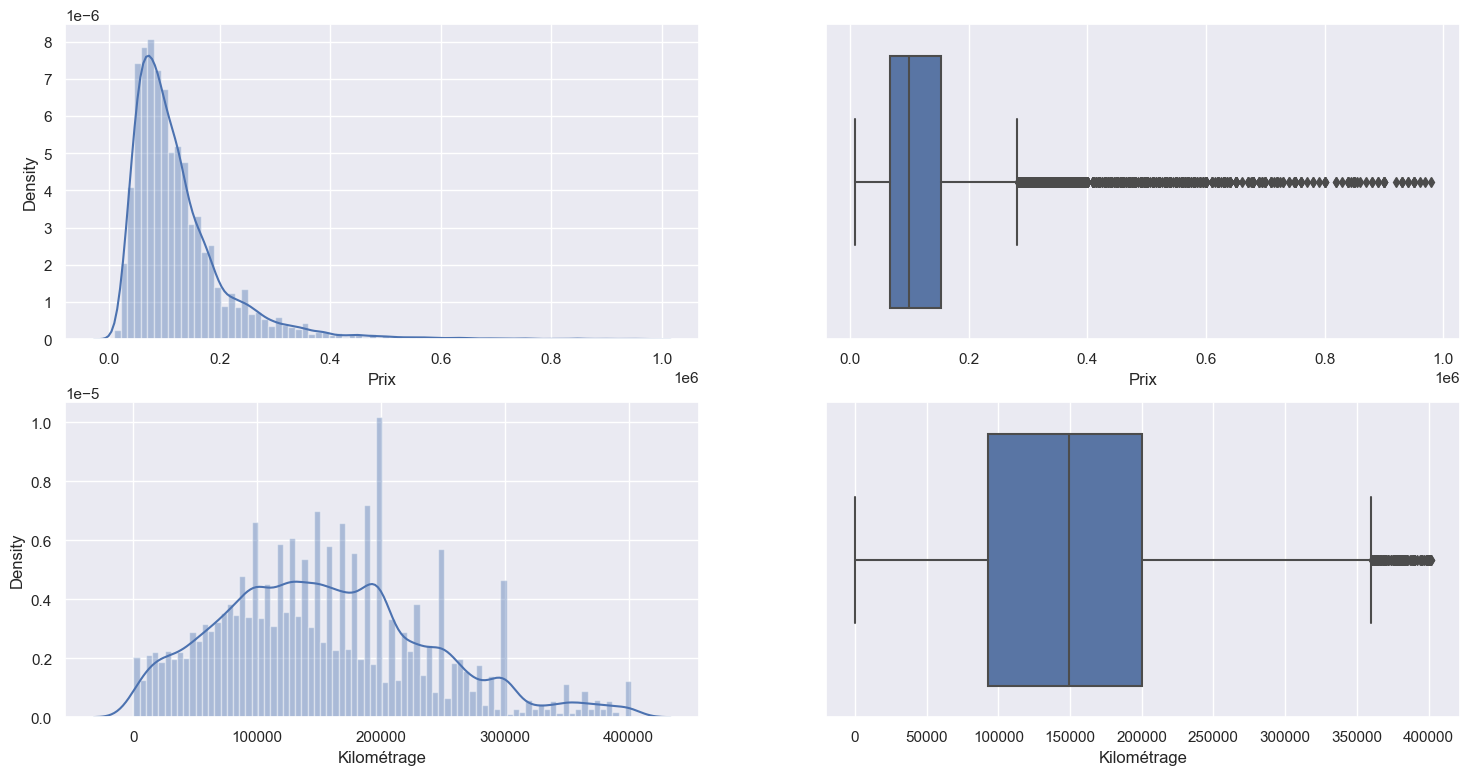

In [20]:
plt.figure(figsize=[18,9])

plt.subplot(2,2,1)
sns.distplot(df['Prix'], bins=80)
plt.subplot(2,2,2)
sns.boxplot(df['Prix'])
plt.subplot(2,2,3)
sns.distplot(df['Kilométrage'], bins=80)
plt.subplot(2,2,4)
sns.boxplot(df['Kilométrage'])

In [21]:
# vérifier une fois de plus les statistiques descriptives

df.describe()

,Kilométrage,Année,Puissance fiscale,Nombre de portes,Prix
count,30463.000000,30463.000000,30463.000000,30463.000000,30463.000000
mean,154546.080139,2010.441027,7.549913,4.718113,126137.190165
std,83660.342195,6.602037,2.360952,0.632415,94194.600486
min,2.000000,1940.000000,2.000000,2.000000,8000.000000
25%,93000.000000,2007.000000,6.000000,4.721053,67000.000000
50%,149000.000000,2012.000000,7.000000,5.000000,100000.000000
75%,200000.000000,2015.000000,8.000000,5.000000,153000.000000
max,402000.000000,2022.000000,60.000000,10.000000,980000.000000


Nous remarquons que l'intervalle de chaque variable est différent. La valeur maximale de **Nombre de portes** est **10**, mais celle du **Kilométrage** est  **364000**. Ainsi, une mise à l'échelle des caractéristiques **(Scaling)** doit être effectuée sur l'ensemble des données pour que les données conviennent à différents algorithmes.
- **Scaling :** Il s'agit de placer les valeurs dans la même plage ou la même échelle, de sorte qu'aucune variable ne soit dominée par une autre.

- ## La relation entre les variables numériques et le Prix

<AxesSubplot: xlabel='Nombre de portes', ylabel='Prix'>

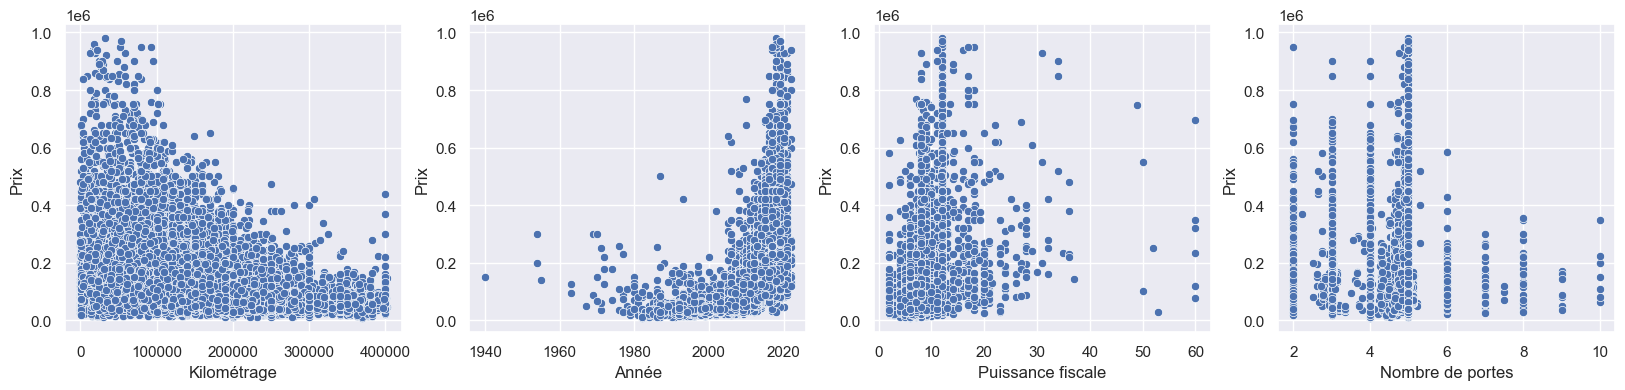

In [22]:
plt.figure(figsize=[20,4])

plt.subplot(1,4,1)
sns.scatterplot(data=df, x="Kilométrage", y="Prix")
plt.subplot(1,4,2)
sns.scatterplot(data=df, x="Année", y="Prix")
plt.subplot(1,4,3)
sns.scatterplot(data=df, x="Puissance fiscale", y="Prix")
plt.subplot(1,4,4)
sns.scatterplot(data=df, x="Nombre de portes", y="Prix")

D'après les graphiques ci-dessus, nous pouvons voir que **"Année"** et **"Puissance fiscale"** sont positivement corrélés avec le prix, tandis que le **"Kilométrage"** est négativement corrélé avec le prix. Enfin, le **"Nombre de portes"** ne montre aucune corrélation.

- ## Relation entre le kilométrage, l'année et le prix

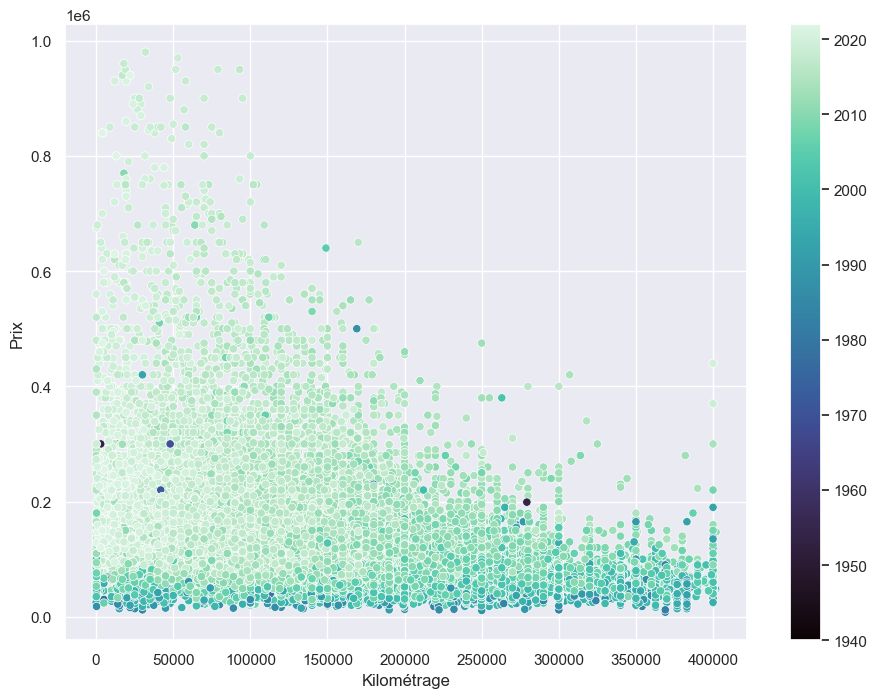

In [23]:
from matplotlib import colors

norm = plt.Normalize(df['Année'].min(), df['Année'].max())
cmap = sns.color_palette(palette, as_cmap=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

plt.figure(figsize=(11, 8))
ax = sns.scatterplot(x='Kilométrage', y='Prix', data=df, palette=palette, hue='Année')

ax.get_legend().remove()
ax.figure.colorbar(sm)

En général, les voitures chères sont neuves et ont un faible kilométrage, et les vieilles voitures avec un kilométrage élevé sont bon marché.

- ## Matrice de corrélation

<AxesSubplot: >

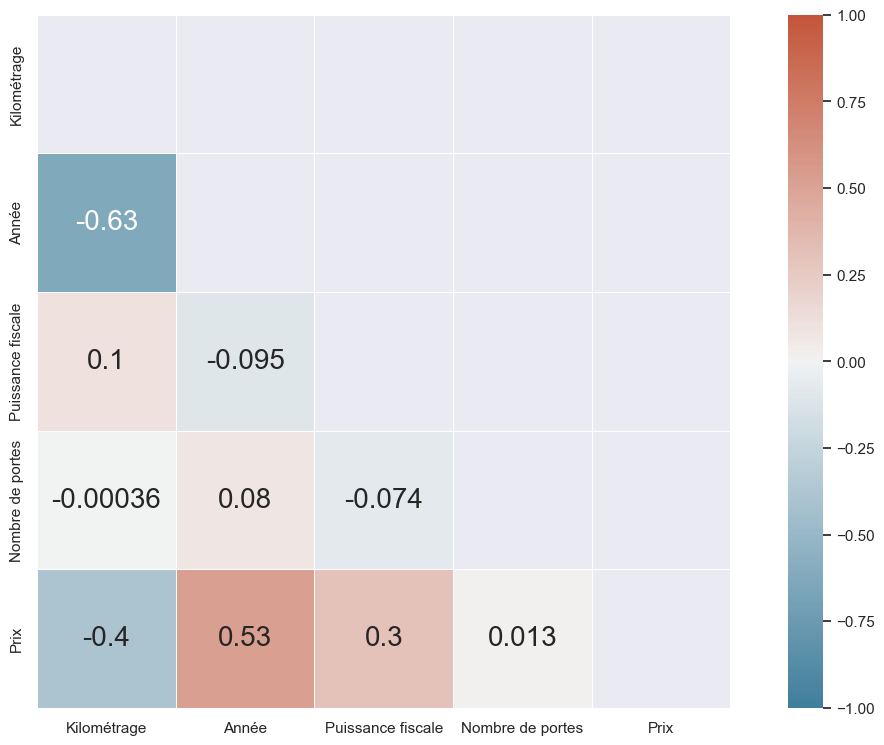

In [24]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(15, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, annot=True,annot_kws={"fontsize":20}, cmap=cmap, vmax=1,vmin=-1,
            center=0, square=True, linewidths=.5)

Dans la matrice de corrélation, les valeurs sont situées entre **-1** et **+1**. Les valeurs proches de **-1** sont interprétées comme des **corrélations négatives**, les valeurs proches de **+1** sont interprétées comme des **corrélations positives**.

Si la valeur est proche de **0**, cela indique qu'il n'y a pas de lien entre ces deux variables.

### Observations

- **L'année**, **la puissance fiscale** et **le nombre de portes** sont ***positivement corrélées*** au **prix**.
- **Le kilométrage** est ***négativement corrélé*** au **prix**.
- **nombre de portes** a une corrélation de **0,017** avec le prix (<0,1 très proche de 0). On peut donc éliminer cette colonne.

In [25]:
# Supprimer le colonne "Nombre de portes"

df.drop("Nombre de portes", axis=1, inplace=True)

## Visualiser les variables catégorielles :

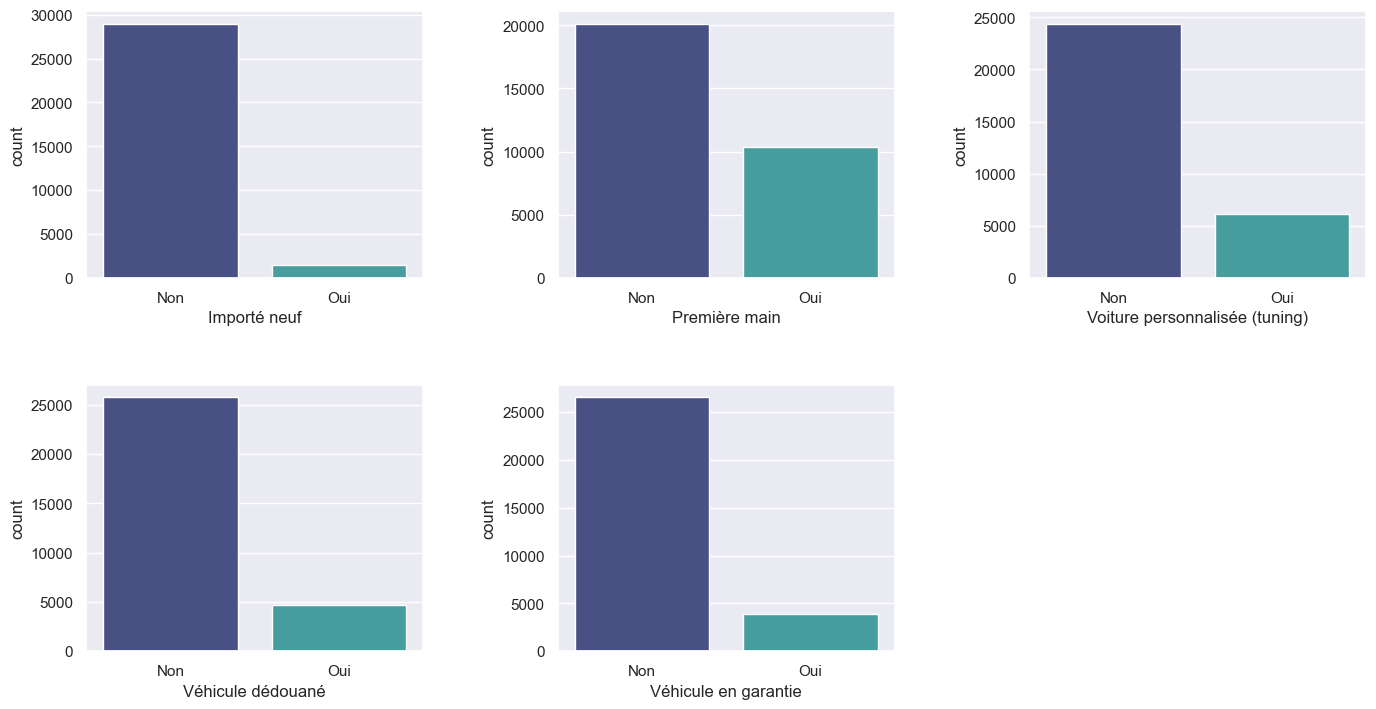

In [26]:
# La distribution des variable binaire 

col_category = ["Importé neuf","Première main","Voiture personnalisée (tuning)",
                "Véhicule dédouané","Véhicule en garantie"]

k=0
plt.figure(figsize=(16,8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for col in col_category:    
    k=k+1
    plt.xticks(rotation=0)
    plt.subplot(2, 3,k)    
    sns.countplot(x=col, data=df,palette=palette, order = df[col].value_counts().index)

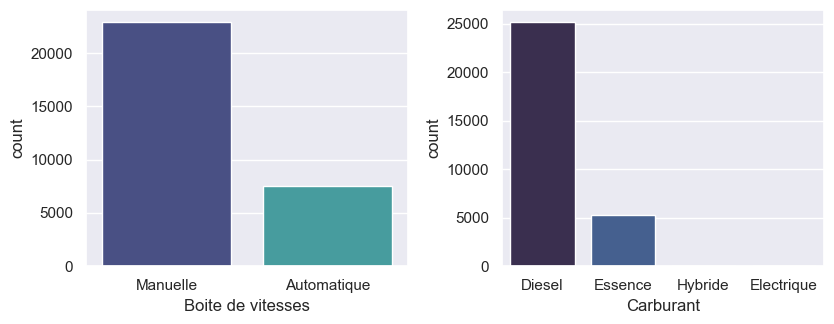

In [27]:
# La distribution de la colonne "Boite de vitesses" et "Carburant"

plt.figure(figsize=(8.5, 3.4))

plt.subplot(1, 2, 1)    
sns.countplot(x='Boite de vitesses', data=df, palette=palette, order = df['Boite de vitesses'].value_counts().index)

plt.subplot(1, 2, 2)  
sns.countplot(x='Carburant', data=df, palette=palette, order = df['Carburant'].value_counts().index)

plt.tight_layout() 

In [28]:
# Carburant
# le colonnes est fortement déséquilibrée (supprimer les voitures avec le type de carburant Hypride & Electrique)

df = df.loc[df["Carburant"] != "Hybride"]
df = df.loc[df["Carburant"] != "Electrique"]

<AxesSubplot: xlabel='Marque', ylabel='count'>

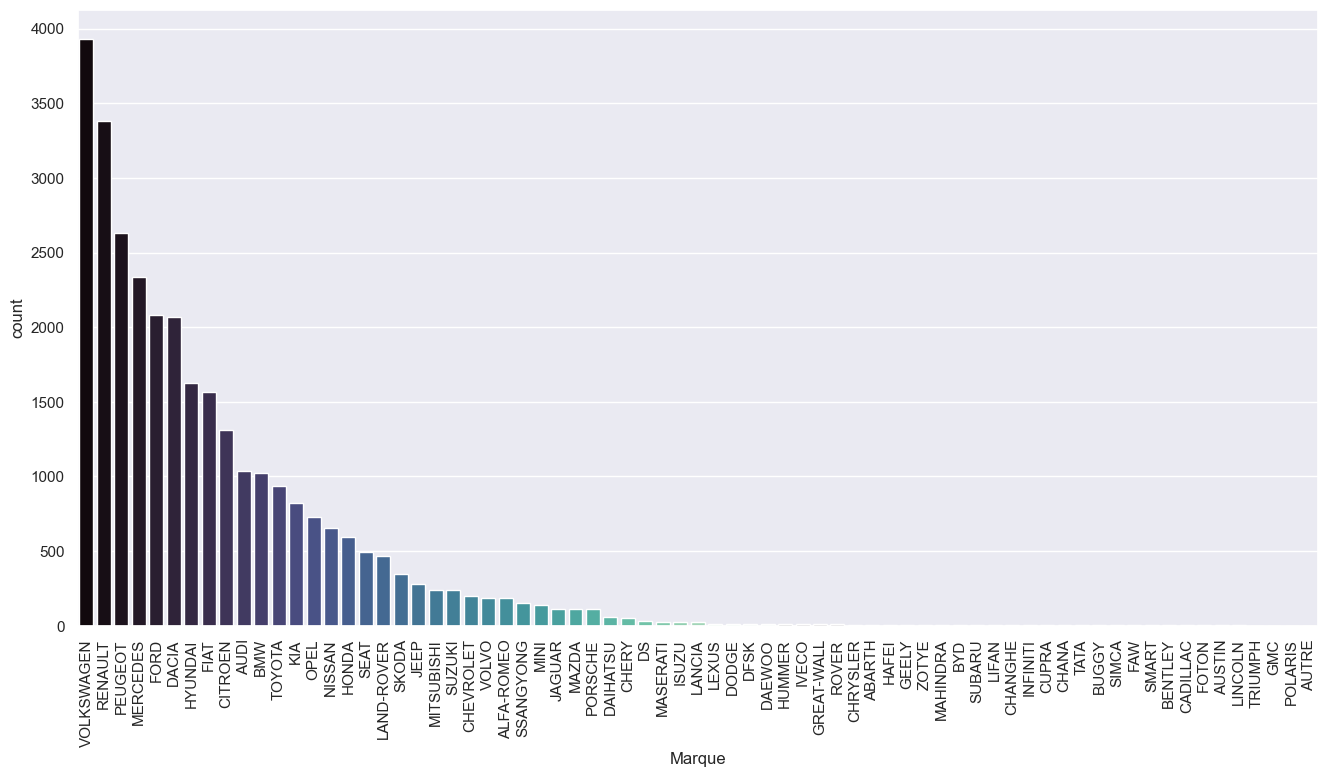

In [29]:
# La distribution de la colonne "Marque"

plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.countplot(x='Marque', data=df, palette=sns.color_palette(palette, 40), order = df["Marque"].value_counts().index)

<AxesSubplot: xlabel='Couleur', ylabel='count'>

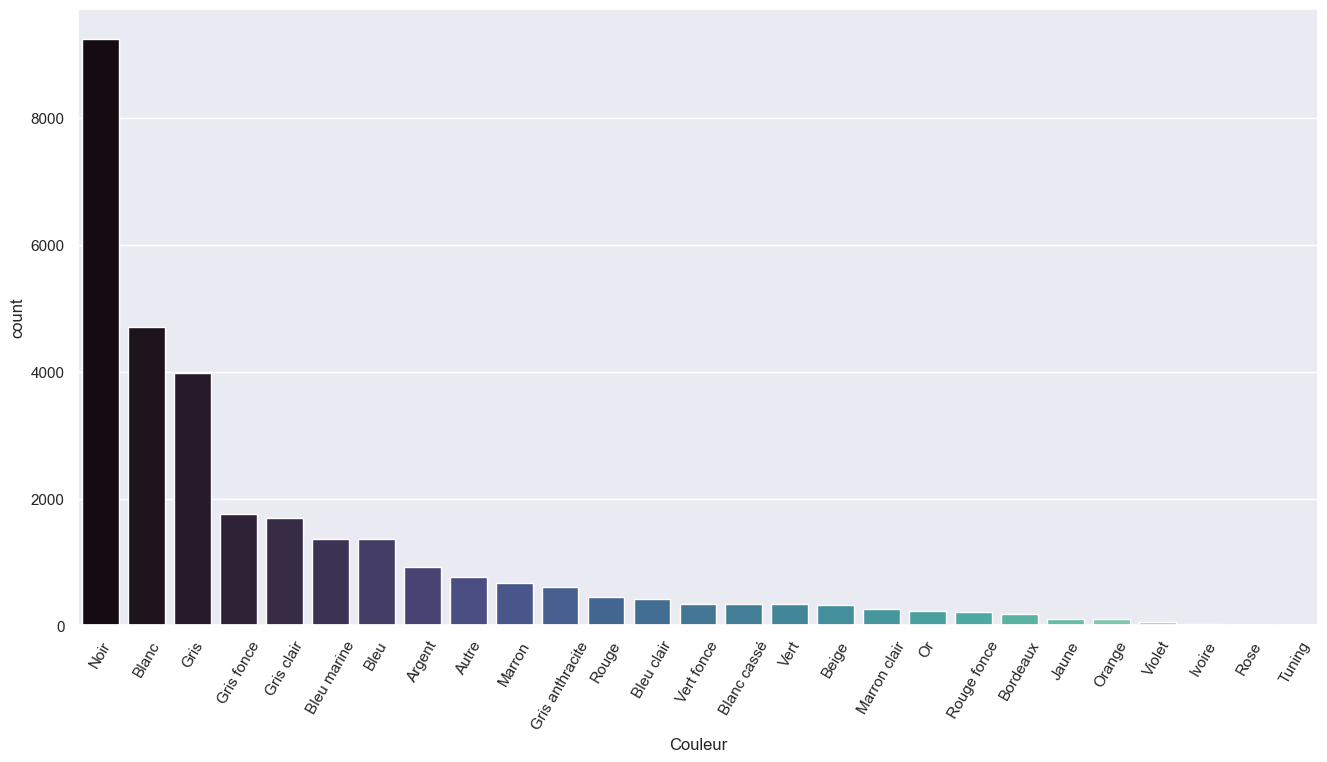

In [30]:
# La distribution de la colonne "Couleur"

plt.figure(figsize=(16, 8))
plt.xticks(rotation=60)
sns.countplot(x='Couleur', data=df, palette=palette, order = df["Couleur"].value_counts().index)

<AxesSubplot: xlabel='Carrosserie', ylabel='count'>

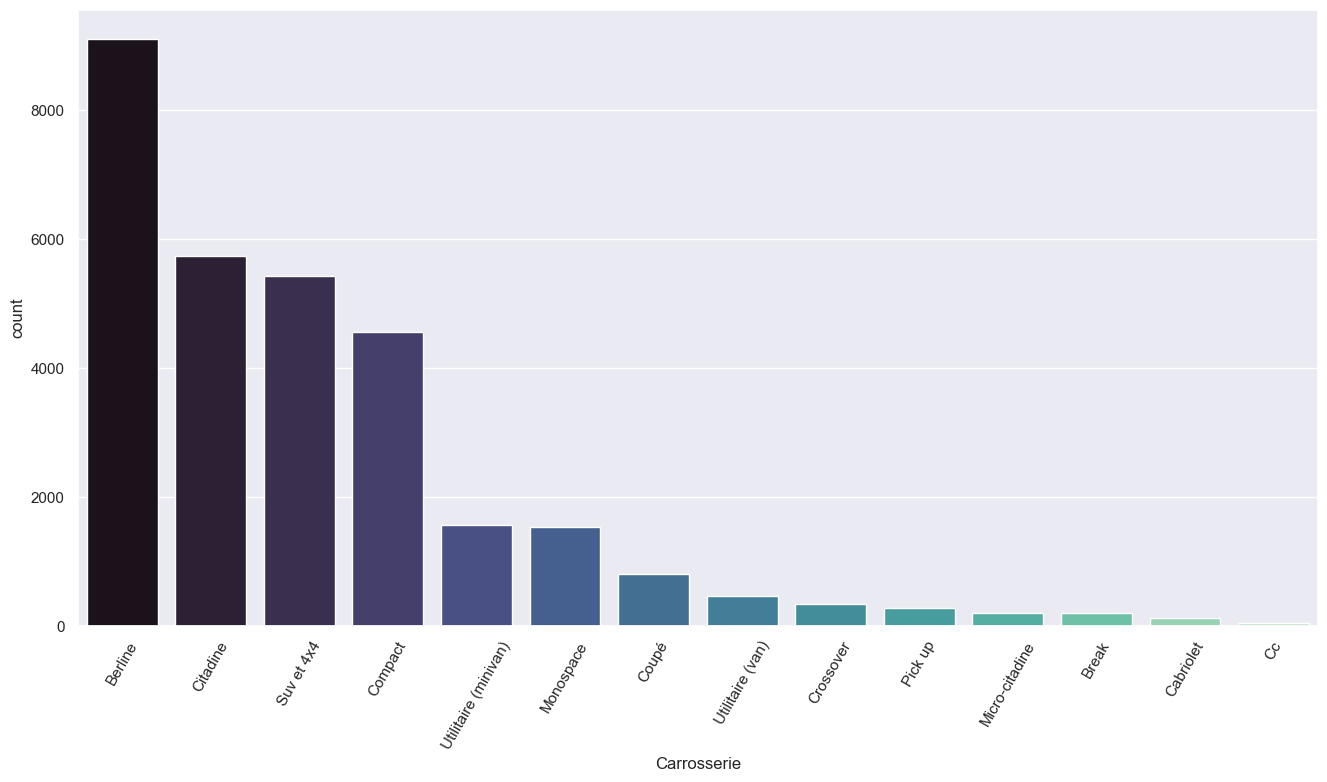

In [31]:
# La distribution de la colonne "Carrosserie"

plt.figure(figsize=(16, 8))
plt.xticks(rotation=60)
sns.countplot(x='Carrosserie', data=df, palette=palette, order = df["Carrosserie"].value_counts().index)

### Observations :

- **Boite de vitesses:** le nombre des voitures *manuelle* est plus que les voitures *automatique*. <br>
- **Carbunat:** Le nombre de voitures *diesel* est plus grand.  <br>
- **Marque :** On peut voir que *VOLKSWAGEN* est la marque la plus fréquente de l'ensemble de données. <br>
- **Couleur :** *Noir* est le couleur la plus fréquente de l'ensemble de données. <br>
- **Carrosserie :** *Berline* est la Carrosserie la plus fréquente de l'ensemble de données.

- ## La relation entre les variables catégorielles et le Prix

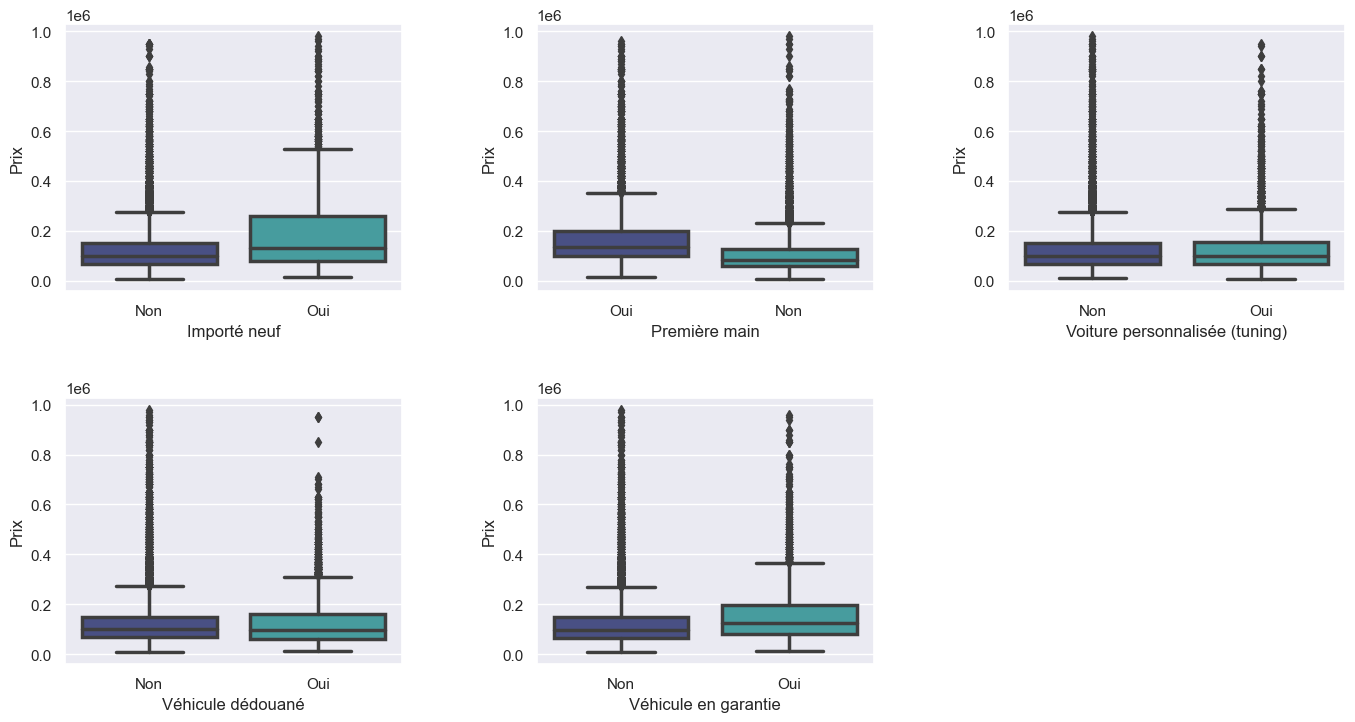

In [32]:
# Boxplot pour les variable binaire

col_category = ["Importé neuf","Première main","Voiture personnalisée (tuning)",
                "Véhicule dédouané","Véhicule en garantie"]

k=0
plt.figure(figsize=(16, 8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
for col in range (len(col_category)):    
    k=k+1
    plt.xticks(rotation=0)
    plt.subplot(2, 3, k)   
    ax = sns.boxplot(x = col_category[col], y = 'Prix', data = df, palette=palette,linewidth=2.5)

In [33]:
df.drop("Voiture personnalisée (tuning)", axis=1, inplace=True)

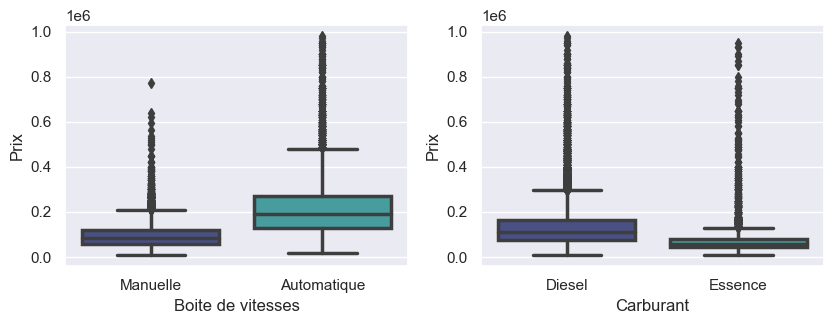

In [34]:
# BoxPlot : "Boite de vitesses" & "Carburant"

plt.figure(figsize=(8.5, 3.4))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Boite de vitesses', y = 'Prix', palette=palette, data = df, linewidth=2.5)
plt.subplot(1, 2, 2)  
sns.boxplot(x = 'Carburant', y = 'Prix', palette=palette, data = df, linewidth=2.5)

plt.tight_layout() 

<AxesSubplot: xlabel='Marque', ylabel='Prix'>

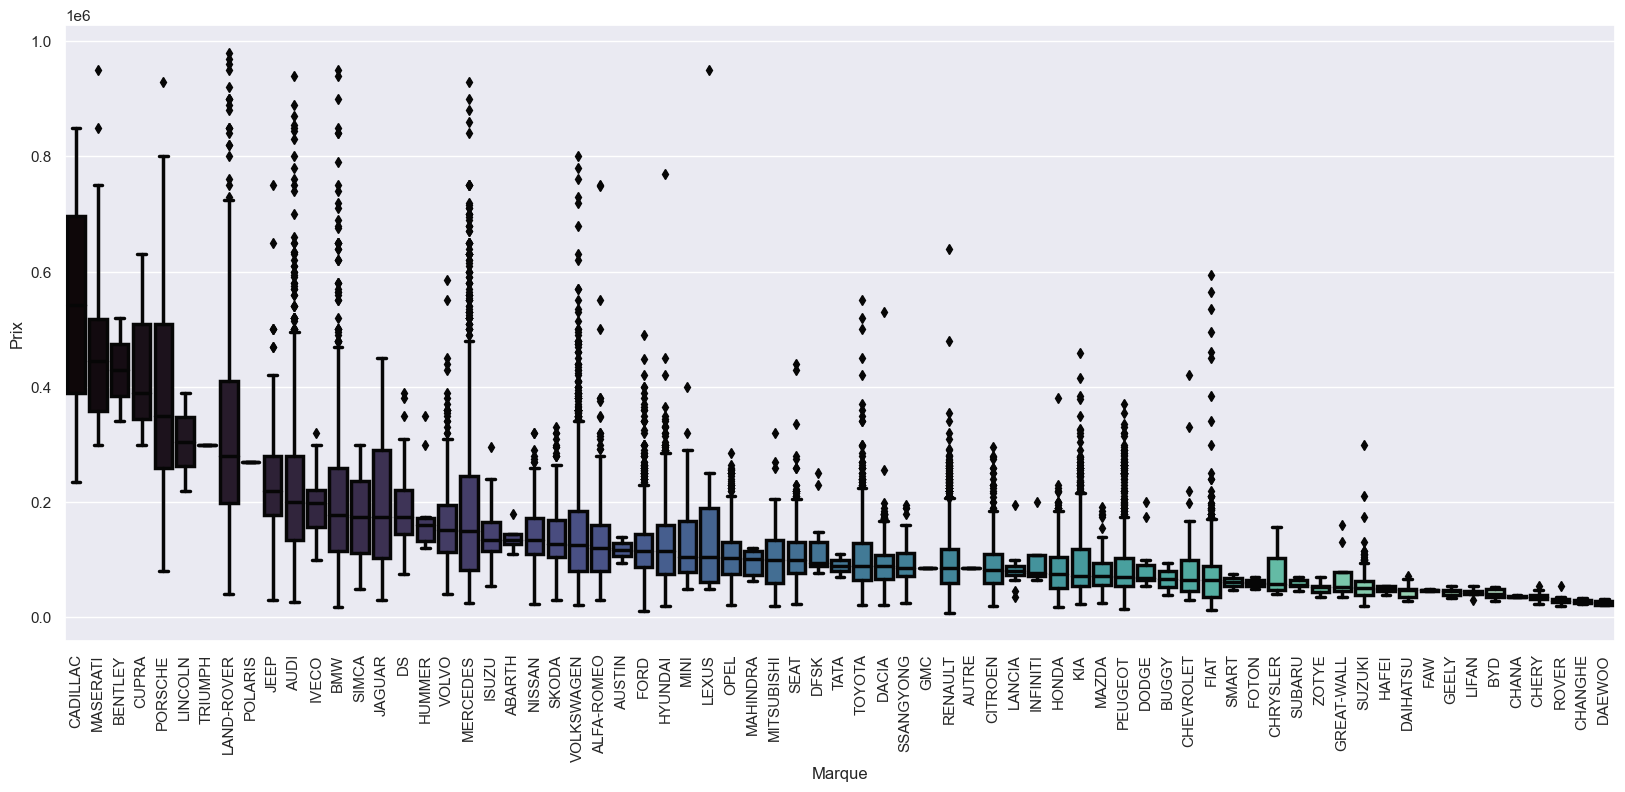

In [35]:
# BoxPlot : "Marque"

plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
my_order = df.groupby(by=["Marque"])["Prix"].median().sort_values().iloc[::-1].index
sns.boxplot(x = 'Marque', y = 'Prix', palette=palette, data = df, linewidth=2.5, order=my_order)

Que la figure ci-dessus **ne s'affiche pas** bien, nous utiliserons la figure suivante qui **s'affiche bien** le **prix médian** de chaque compagnie automobile.

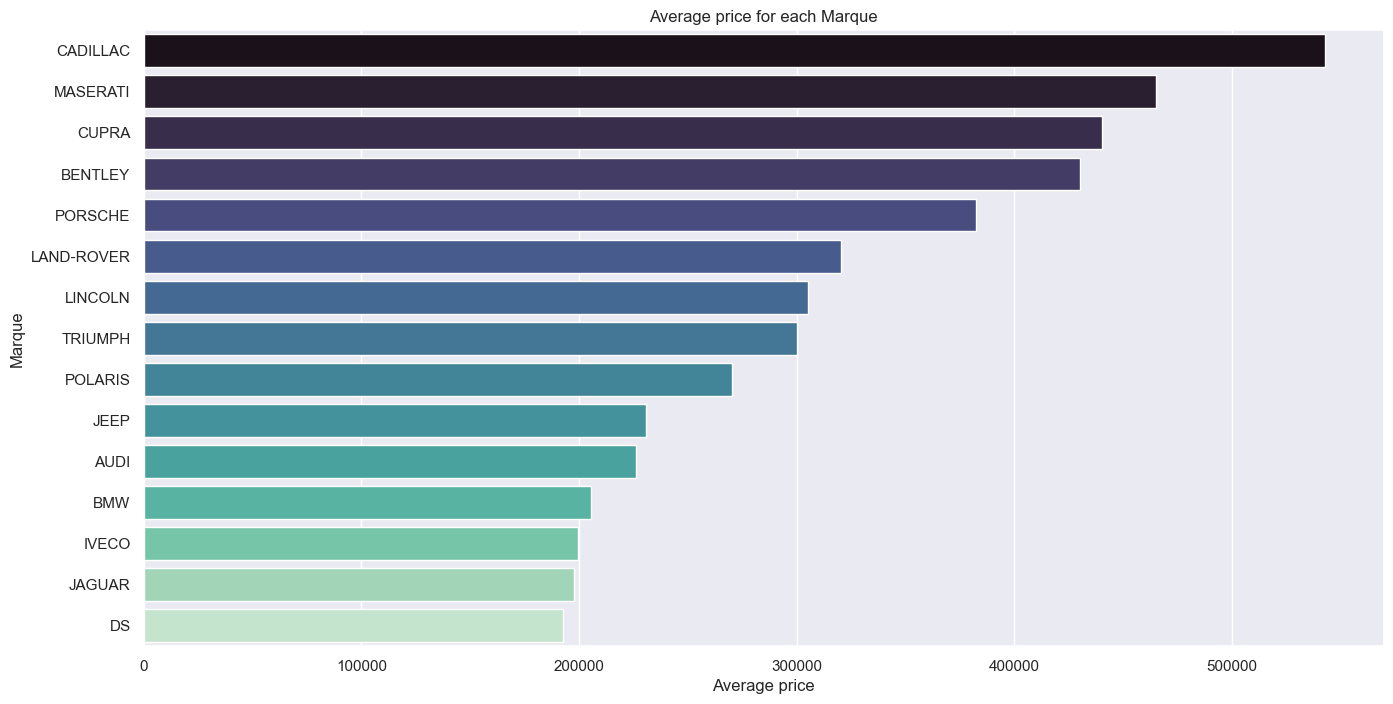

In [36]:
# Top 15 Marque

plt.figure(figsize=(16, 8))
column = 'Marque'
graph =  df.groupby(column)['Prix'].mean().sort_values(ascending=False).iloc[:15]
fig = sns.barplot(x = graph.values, y = graph.index, palette=palette);
fig.set(xlabel = 'Average price', ylabel = 'Marque', title = 'Average price for each Marque');

<AxesSubplot: xlabel='Couleur', ylabel='Prix'>

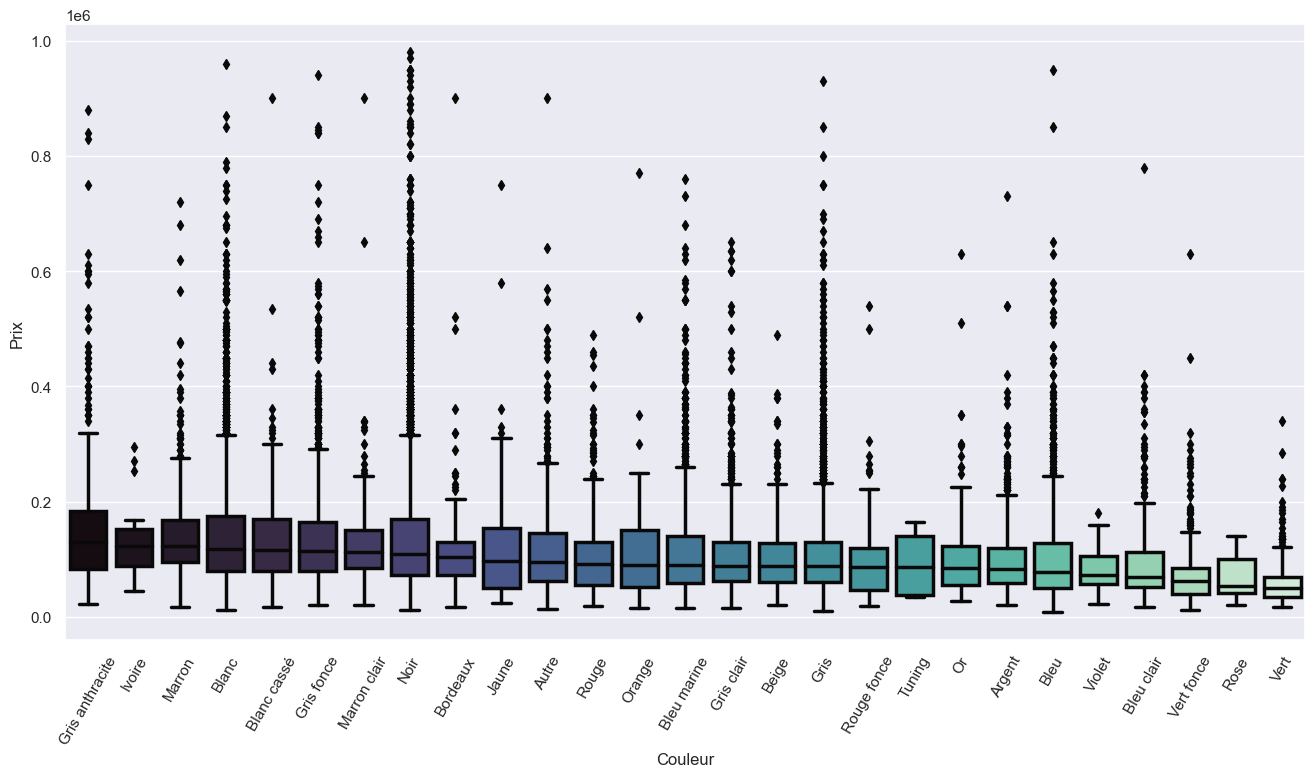

In [37]:
# BoxPlot "Couleur" 

plt.figure(figsize=(16, 8))
plt.xticks(rotation=60)
my_order = df.groupby(by=["Couleur"])["Prix"].median().sort_values().iloc[::-1].index
sns.boxplot(x = 'Couleur', y = 'Prix', palette=palette, data = df, linewidth=2.5, order=my_order)

<AxesSubplot: xlabel='Carrosserie', ylabel='Prix'>

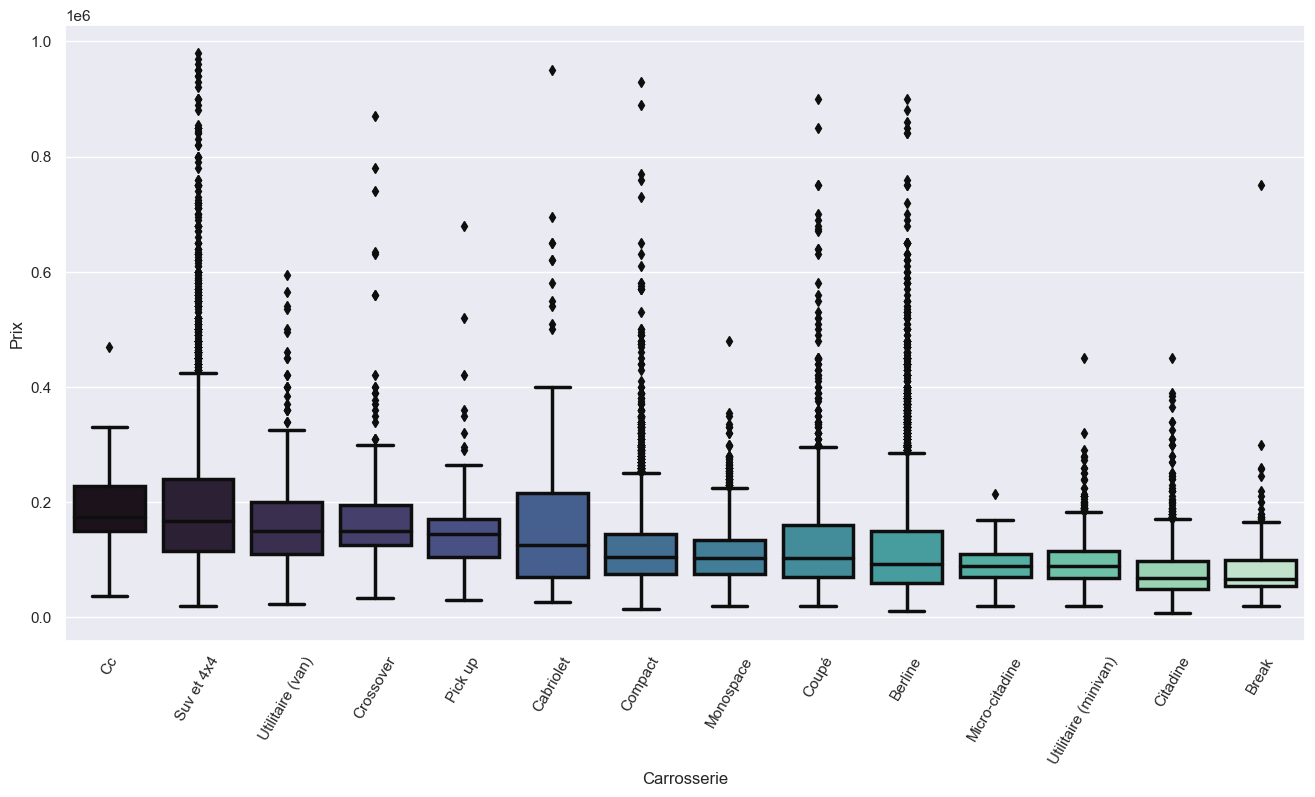

In [38]:
# BoxPlot "Carrosserie"

plt.figure(figsize=(16, 8))
plt.xticks(rotation=60)
my_order = df.groupby(by=["Carrosserie"])["Prix"].median().sort_values().iloc[::-1].index
sns.boxplot(x = 'Carrosserie', y = 'Prix', palette=palette, data = df, linewidth=2.5, order=my_order)

### Observations :

- **Boite de vitesses :** Les voitures *automatique* a un prix médian plus élevé que les voitures *manuelle*. <br>
- **Carburant :** *Essance* ont un prix médian plus bas que *Diseal*. <br>
- **Marque :** *CADILLAC* a un prix médian très élevé par rapport aux autres voitures, bien que le nombre de voitures *CADILLAC* soit très faible. <br>
- **Couleur :** Les voitures avec une couleur *Gris anthracite* a un prix médian plus élevé que les autres.
- **Carrosserie :** Les voitures de type *Cc et 4x4* a un prix médian plus élevé que les autres.

In [39]:
df.head()

,Marque,Model,Kilométrage,Année,Boite de vitesses,Carburant,Puissance fiscale,Première main,Véhicule dédouané,Véhicule en garantie,Importé neuf,Couleur,Carrosserie,Options,Prix
0,HYUNDAI,Creta,85100.0,2016,Manuelle,Diesel,6.0,Oui,Non,Non,Non,Marron clair,Suv et 4x4,"['Dvd / cd / mp3', 'Jantes aluminium', 'Airbag...",160000
1,FORD,Explorer,52654.0,2014,Automatique,Essence,20.0,Non,Non,Non,Non,Noir,Suv et 4x4,"['Jantes aluminium', 'Airbags', 'Climatisation...",245000
2,FORD,Fusion,52387.0,2017,Manuelle,Diesel,8.0,Oui,Non,Oui,Non,Noir,Berline,"['Jantes aluminium', 'Airbags', 'Climatisation...",165000
3,AUDI,A4,130529.0,2017,Automatique,Diesel,8.0,Oui,Non,Non,Non,Noir,Berline,"['Jantes aluminium', 'Airbags', 'Climatisation...",268000
4,FORD,Fusion,137481.0,2016,Automatique,Diesel,8.0,Oui,Non,Non,Non,Noir,Berline,"['Airbags', 'Climatisation auto', 'Abs', 'Syst...",205000


# Prétraitement des données

## Encodage des attributs catégoriques

- ### MultiLabelBinarizer

Nous encoderons la colonne **(Option)** avec la technique d'encodage ***MultiLabelBinarizer*** car elle se présente sous la forme d'une liste de catégories **(Options)**

In [40]:
# OPTIONS
# le colonne ["Options"] est sous la forme d'une list des options

df["Options"].head()

0    ['Dvd / cd / mp3', 'Jantes aluminium', 'Airbag...
1    ['Jantes aluminium', 'Airbags', 'Climatisation...
2    ['Jantes aluminium', 'Airbags', 'Climatisation...
3    ['Jantes aluminium', 'Airbags', 'Climatisation...
4    ['Airbags', 'Climatisation auto', 'Abs', 'Syst...
Name: Options, dtype: object

On va **converter** le colonne ***Options*** en plusieur colonnes avec des ***0*** et des ***1***, Chaque colonne **représente** une seul **option** ***(MultiLabelBinarizer)***

<img src="Imgs/MultiLabelBinarizer.png" width=600>

In [41]:
# literal_eval : évalue les chaînes de caractères contenant du code Python dans l'environnement Python actuel.
from ast import literal_eval

df['Options']  = df['Options'].apply(literal_eval)

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

df_opts = pd.DataFrame(mlb.fit_transform(df['Options']), columns=mlb.classes_, index=df.index)
df_opts.head()

,Abs,Affichage tête haute,Aide parking,Airbags,Alarme,Anti brouillard,Anti démarrage,Anti patinage,Capote électrique,Carnet d'entretien,Climatisation auto,Climatisation multizone,Contrôle de pression des pneus,Direction assistée,Dvd / cd / mp3,Détecteur de pluie,Esp,Frein de parking automatique,Intérieur cuir,Jantes aluminium,Keyless go,Limiteur de vitesse,Non fumeur,Ordinateur de bord,Projecteurs xenon,Radar de recul,Radio commande au volant,Régulateur de vitesse,Rétroviseur extérieur électrique,Siège chauffant,Siége electrique,Siége sport,Suspension sport,Système d'identification du conducteur,Système de navigation / gps,Toit ouvrant,Toit ouvrant panoramique,Verrouillage centralisé à distance,Vitres surteintées,Vitres éléctriques,Volant reglable,Volant sport
0,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0
3,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0
4,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0


In [43]:
df_opts.shape

(30406, 42)

In [44]:
df.drop("Options",axis=1,inplace=True)
df = pd.concat([df.drop("Prix",axis=1), df_opts, df["Prix"]],axis=1)

In [45]:
df.head()

,Marque,Model,Kilométrage,Année,Boite de vitesses,Carburant,Puissance fiscale,Première main,Véhicule dédouané,Véhicule en garantie,Importé neuf,Couleur,Carrosserie,Abs,Affichage tête haute,Aide parking,Airbags,Alarme,Anti brouillard,Anti démarrage,Anti patinage,Capote électrique,Carnet d'entretien,Climatisation auto,Climatisation multizone,Contrôle de pression des pneus,Direction assistée,Dvd / cd / mp3,Détecteur de pluie,Esp,Frein de parking automatique,Intérieur cuir,Jantes aluminium,Keyless go,Limiteur de vitesse,Non fumeur,Ordinateur de bord,Projecteurs xenon,Radar de recul,Radio commande au volant,Régulateur de vitesse,Rétroviseur extérieur électrique,Siège chauffant,Siége electrique,Siége sport,Suspension sport,Système d'identification du conducteur,Système de navigation / gps,Toit ouvrant,Toit ouvrant panoramique,Verrouillage centralisé à distance,Vitres surteintées,Vitres éléctriques,Volant reglable,Volant sport,Prix
0,HYUNDAI,Creta,85100.0,2016,Manuelle,Diesel,6.0,Oui,Non,Non,Non,Marron clair,Suv et 4x4,1,0,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,160000
1,FORD,Explorer,52654.0,2014,Automatique,Essence,20.0,Non,Non,Non,Non,Noir,Suv et 4x4,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,245000
2,FORD,Fusion,52387.0,2017,Manuelle,Diesel,8.0,Oui,Non,Oui,Non,Noir,Berline,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,165000
3,AUDI,A4,130529.0,2017,Automatique,Diesel,8.0,Oui,Non,Non,Non,Noir,Berline,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,268000
4,FORD,Fusion,137481.0,2016,Automatique,Diesel,8.0,Oui,Non,Non,Non,Noir,Berline,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,205000


In [46]:
df.to_csv("data/ml_data.csv",index=False)

Pour **les autres colonnes**, nous les encodons via **PyCaret**.

- ## Scaling (Normalisation)

<div style="text-align: justify">
La <strong>normalisation / mise à l'échelle (Scaling)</strong> est utilisée pour <strong>transformer</strong> les valeurs réelles des variables numériques de manière à obtenir des propriétés utiles pour l'apprentissage automatique. De nombreux algorithmes tels que <strong>la régression linéaire</strong>, <strong>la machine à vecteurs de support (SVM)</strong> et <strong>les K plus proches voisins (KNN)</strong> supposent que toutes les caractéristiques sont centrées autour de zéro et ont des variances du même niveau d'ordre. Si une caractéristique particulière d'un ensemble de données a une variance d'un ordre de grandeur supérieur à celui des autres caractéristiques, le modèle <strong>risque</strong> de ne pas comprendre correctement toutes les caractéristiques et d'obtenir de <strong>mauvaises performances</strong>.
</div>

<img src="Imgs/Min-Max.PNG" width=600>

La normalisation **Min-Max** est appliquée à partir de **PyCaret**.

- ## Transformation

<div style="text-align: justify">
Alors que la <strong>normalisation</strong> transforme la plage de données pour supprimer l'impact de la magnitude de la variance, la <strong>transformation</strong> est une technique plus radicale car elle change la forme de la distribution de sorte que les données transformées puissent être représentées par <strong>une distribution normale</strong> ou <strong>approximativement normale</strong>. En général, nous devons transformer les données si nous utilisons des algorithmes qui supposent la normalité ou <strong>une distribution gaussienne</strong>. Des exemples de tels modèles sont <strong>la régression linéaire, la régression Lasso et la régression Ridge.</strong> Il existe deux méthodes de transformation : la méthode de <strong>box-cox</strong> et la méthode du <strong>yeo-johnson</strong>.
</div>

<img src="Imgs/Yeo-Johnson.png" width=600>

La transformation **Yeo-Johnson** pour les caractéristiques et la cible (Target) est appliquée à partir de **PyCaret**.

# Machine Learning (with PyCaret)

Il s'agit maintenant de choisir les techniques de modélisation que nous voulons utiliser. Il existe de nombreuses techniques disponibles pour les problèmes de régression, comme **Linear Regression**, **Ridge Regression**, **Artificial Neural Networks** etc. Dans ce projet, nous allons tester de nombreuses techniques de modélisation, puis choisir la ou les techniques qui donnent les meilleurs résultats. Les techniques que nous allons essayer sont les suivantes :

- **Linear Regression**
- **Nearest Neighbors**
- **Support Vector Regression**
- **Decision Trees**
- **Random Forest**
- **Gradient Boosting...**

pour **faciliter le processus d'expérimentation** on va utilise la bibliothèque d'apprentissage automatique **PyCaret**

**PyCaret** est une bibliothèque d'apprentissage automatique en Python, open-source et à faible code, qui automatise les flux d'apprentissage automatique. Il s'agit d'un outil d'apprentissage automatique et de gestion de modèles de bout en bout qui accélère le cycle d'expérimentation de manière exponentielle et nous rend plus productifs.

In [45]:
from pycaret.regression import *

s = setup(data=df, 
          target='Prix',
          train_size=0.8,
          max_encoding_ohe = 100,
          normalize=True,
          normalize_method="zscore",
          # normalize_method="minmax",
          transformation=True,
          transformation_method = 'yeo-johnson',
          transform_target=True,
          transform_target_method='yeo-johnson',
          fold=5,
          session_id=49,
          # log_experiment=True,
          # experiment_name="comparer_all",
          # use_gpu=True
          )

,Description,Value
0,Session id,49
1,Target,Prix
2,Target type,Regression
3,Data shape,"(31298, 166)"
4,Train data shape,"(24810, 166)"
5,Test data shape,"(6422, 166)"
6,Ordinal features,6
7,Numeric features,45
8,Categorical features,10
9,Preprocess,True


## Comparer tous les modèles

<div style="text-align: justify">
    La comparaison de tous les modèles pour évaluer <strong>les performances</strong>  est le point de départ recommandé pour la modélisation une fois la configuration terminée. Cette fonction entraîne tous les modèles de la bibliothèque de modèles et les note en utilisant la validation croisée <strong>k-fold</strong>  pour l'évaluation métrique. La sortie imprime une grille de notation qui montre la moyenne de <strong>MAE, MSE, RMSE, R2, RMSLE, et MAPE </strong> à travers les plis (5 folds) ainsi que le temps de formation de chaque modèle.<br>
</div>

In [46]:
# best = compare_models()
# best = compare_models(turbo=False)
best = compare_models(exclude=["kr","ransac","lar"], turbo=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15385.1773,5479965821.2929,61823.2449,0.7466,0.1669,0.1138,5.1340
xgboost,Extreme Gradient Boosting,16487.9947,5776657515.0789,63308.5542,0.7350,0.1771,0.1226,5.9500
lightgbm,Light Gradient Boosting Machine,16503.5953,5918668242.8086,65123.5691,0.7197,0.1764,0.1207,1.3180
et,Extra Trees Regressor,16410.2932,6255586372.0532,67705.0552,0.6979,0.1793,0.1192,14.2100
rf,Random Forest Regressor,18259.6913,6543348831.5095,69253.6833,0.6844,0.1957,0.1343,9.5540
gbr,Gradient Boosting Regressor,19259.7031,6478452806.9774,69620.4409,0.6815,0.1979,0.1396,3.7460
ridge,Ridge Regression,20381.3851,7262386567.6643,74619.0287,0.6349,0.2143,0.1463,1.2040
br,Bayesian Ridge,20392.2584,7266910652.8921,74651.8184,0.6346,0.2144,0.1463,1.4440
huber,Huber Regressor,20230.5764,7315795200.3583,75027.2782,0.6310,0.2153,0.1453,2.0360
par,Passive Aggressive Regressor,26210.0832,7749669289.5902,78252.2025,0.5980,0.2605,0.1937,1.0200


Nous avons donc essayé différents **algorithmes de régression** et avons constaté que **les trois meilleurs** modèles sont les suivants: <BR>
 - **CatBoost Regressor**
 - **Extreme Gradient Boosting**
 - **Light Gradient Boosting Machine**

Nous remarquons que les trois algorithmes **surclassés** sont des algorithme basés sur les arbres et comme nous le savons, les algorithmes basés sur les arbres sont des méthodes qui ne bénéficient pas de **la mise à l'échelle (Scaling)** et ne nécessitent pas que l'ensemble de données suive **une distribution normale (Transformation)**. Nous avons donc décidé de réinitialiser l'environnement pycaret sans mise à l'échelle ni transformation. Nous allons ensuite entraîner et évaluer les trois modèles surclassés dans le nouvel environnement.

## Reconfigurer l’environnement dans PyCaret

In [48]:
from pycaret.regression import *

s = setup(data=df, 
          target='Prix',
          train_size=0.8,
          max_encoding_ohe = 100,
          fold=5,
          session_id=49,
          # log_experiment=True,
          # experiment_name="reset_conf",
          # use_gpu=True
          )

,Description,Value
0,Session id,49
1,Target,Prix
2,Target type,Regression
3,Data shape,"(30406, 164)"
4,Train data shape,"(24324, 164)"
5,Test data shape,"(6082, 164)"
6,Ordinal features,6
7,Numeric features,45
8,Categorical features,10
9,Preprocess,True


## Création des modèles

In [50]:
catboost = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14618.5081,776689587.1754,27869.1512,0.9138,0.1682,0.1208
1,15183.1716,829301698.3730,28797.5988,0.9079,0.1711,0.1269
2,14305.8837,705643066.7520,26563.9430,0.9165,0.1672,0.1223
3,14850.2279,883040022.5276,29715.9893,0.9020,0.1682,0.1182
4,14569.4836,731567793.8958,27047.5099,0.9138,0.1672,0.1228
Mean,14705.4550,785248433.7447,27998.8385,0.9108,0.1684,0.1222
Std,294.9161,64491494.5777,1146.0711,0.0052,0.0014,0.0028


In [ ]:
xgboost = create_model("xgboost")

In [ ]:
lightgbm = create_model("lightgbm")

## Réglage des hyperparamètres

<div style="text-align: justify">
Lorsqu'un modèle est créé à l'aide de la fonction <strong>create_model</strong> create_model, il utilise les <strong>hyperparamètres</strong>  par défaut pour entraîner le modèle. Pour régler  les hyperparamètres, on utilise la fonction <strong>tune_model</strong>. Cette fonction règle automatiquement les hyperparamètres d'un modèle en utilisant <strong>RandomGridSearch</strong> sur un espace de recherche prédéfini. La sortie imprime une grille de notation qui montre<strong> MAE, MSE, RMSE, R2, RMSLE, et MAPE</strong>  par fold. Pour utiliser la grille de recherche personnalisée, nous pouvons passer le paramètre <strong>custom_grid</strong>  dans la fonction <strong>tune_model</strong> .
</div>

- ### CatBoost Regressor

In [51]:
# time : 15:07 

In [51]:
tuned_catboost = load_model('files/tuned_catboost')

Transformation Pipeline and Model Successfully Loaded


- ### Extreme Gradient Boosting

In [50]:
tuned_xgboost = load_model('files/tuned_xgboost')

Transformation Pipeline and Model Successfully Loaded


- ### Light Gradient Boosting Machine

In [99]:
tuned_lightgbm = load_model('files/tuned_lightgbm')

Transformation Pipeline and Model Successfully Loaded


Le régresseur **CatBoost** stocké dans la variable ***tuned_catboost*** est notre meilleur modèle pour ce projet.

## Prédiction sur les données de test

In [54]:
predict_catboost = predict_model(tuned_catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,14356.2247,818011899.7353,28600.9073,0.9086,0.1654,0.1165


In [55]:
predict_xgboost = predict_model(tuned_xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,15786.9028,938620184.9289,30636.9089,0.8951,0.1795,0.1288


In [56]:
predict_lightgbm = predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,15154.9738,919854579.3651,30329.1045,0.8972,0.1737,0.1233


## Tracer le meilleur modèle

Avant la finalisation du modèle, la fonction ***plot_model*** peut être utilisée pour analyser les performances sous différents aspects tels que le tracé des résidus, l'erreur de prédiction, l'importance des caractéristiques, etc. Cette fonction prend un objet modèle entraîné et renvoie un graphique basé sur l'ensemble de test.

- ## Prediction Error Plot

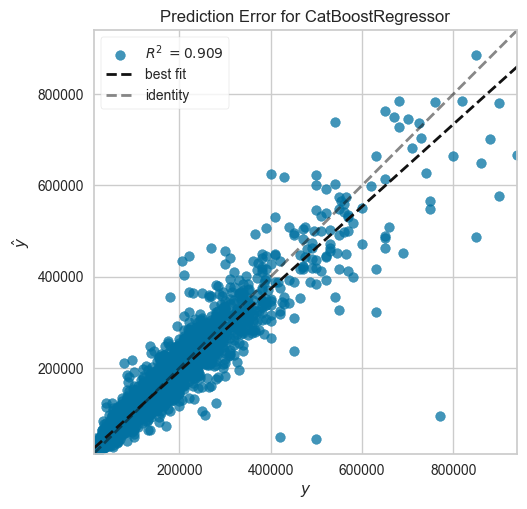

In [53]:
plot_model(tuned_catboost, plot="error")

- ## Residual Plot

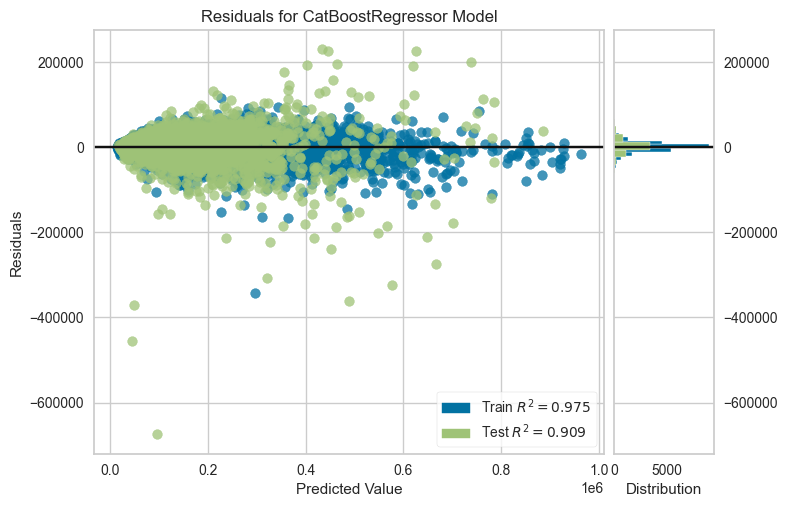

In [54]:
plot_model(tuned_catboost, plot="residuals")

- ## Learning Curve

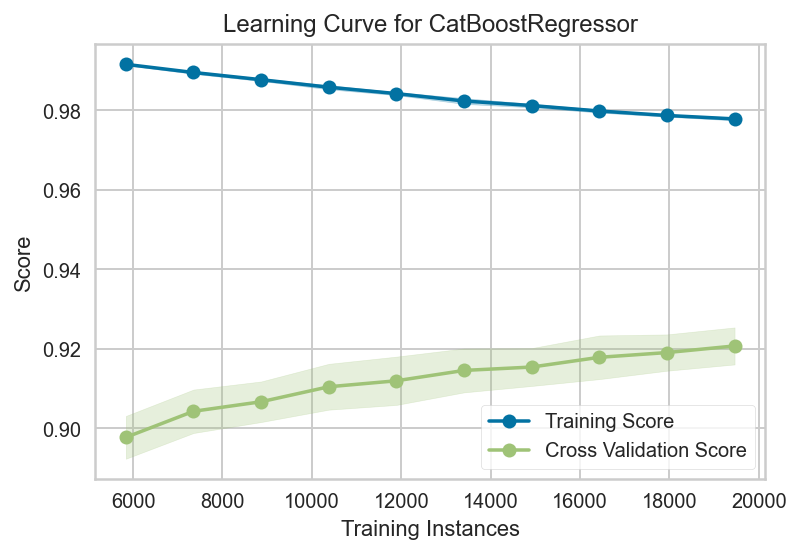

In [59]:
plot_model(tuned_catboost, plot="learning", scale=2)

In [ ]:
plot_model(tuned_catboost, plot="learning", scale=2, plot_kwargs={'scoring':'mean_absolute_error'})

<div style="text-align: justify">
Le graphique indique que le score d'apprentissage <strong>diminue</strong>  et que le score de test <strong>augmente</strong> , ce qui est un signe d'adéquation. Nous pourrions probablement <strong>améliorer</strong>  l'adéquation en <strong>réglant les hyperparamètres (tuning)</strong> , en <strong>sélectionnant les caractéristiques (feature selection)</strong>  ou en <strong>ajoutant des "bonnes données"</strong> .
</div>


Une autre façon d’analyser les performances des modèles est d’utiliser la fonction ***evaluate_model*** qui aﬀiche une interface utilisateur pour tous les graphiques disponibles pour un modèle donné.

## DashBoard

## Finaliser le modèle

Le modèle sera probablement **plus performant** s'il est **entraîné** sur **l'ensemble des données disponibles** que sur le seul sous-ensemble utilisé pour estimer la performance du modèle.

In [105]:
final_catboost_model = finalize_model(tuned_catboost)

## L’interprétation de modèles

In [ ]:
import shap

X = df.drop("Prix",axis=1)
y = df["Prix"]

tr_X = model.transform(X)

explainer = shap.TreeExplainer(model[-1])
shap_values = explainer.shap_values(tr_X)

shap.summary_plot(shap_values, tr_X)

## Faire une prédiction sur une nouvelle voiture

In [55]:
# La dernière vérification consiste à contrôler la prédiction sur une echantillon n'existe pas dans les données d'entrainement.

# https://www.moteur.ma/fr/voiture/achat-voiture-occasion/detail-annonce/383282/kia-proceed-proceed-16-crdi-gt-line.html
# KIA Proceed Proceed 1.6 crdi gt line à 259 000 Dhs

# True Price
CarPrice = 259000

# features
Car = {}
Car["Marque"] = "KIA"
Car["Model"] = "Proceed"
Car["Kilométrage"] = 26000
Car["Année"] = 2019
Car["Boite de vitesses"] = "Automatique"
Car["Carburant"] = "Diesel"
Car["Puissance fiscale"] = 6
#Car["Nombre de portes"] = 5
Car["Première main"] = "Non"
Car["Véhicule en garantie"] = "Oui"
Car["Véhicule dédouané"] = "Non"
#Car['Voiture personnalisée (tuning)'] = "Non"
Car["Importé neuf"] = "Non"
Car["Couleur"] = "Noir"
Car["Carrosserie"] = "Berline"

# Options
Car["Abs"] = 1
Car["Affichage tête haute"] = 0
Car["Aide parking"] = 1
Car["Airbags"] = 1
Car["Alarme"] = 1
Car["Anti brouillard"] = 1
Car["Anti démarrage"] = 1
Car["Anti patinage"] = 1
Car["Capote électrique"] = 0
Car["Carnet d'entretien"] = 0
Car["Climatisation auto"] = 1
Car["Climatisation multizone"] = 1
Car["Contrôle de pression des pneus"] = 1
Car["Direction assistée"] = 0
Car["Dvd / cd / mp3"] = 1
Car["Détecteur de pluie"] = 1
Car["Esp"] = 1
Car["Frein de parking automatique"] = 0
Car["Intérieur cuir"] = 0
Car["Jantes aluminium"] = 1
Car["Keyless go"] = 1
Car["Limiteur de vitesse"] = 1
Car["Non fumeur"] = 0
Car["Ordinateur de bord"] = 1
Car["Projecteurs xenon"] = 0
Car["Radar de recul"] = 0
Car["Radio commande au volant"] = 1
Car["Régulateur de vitesse"] = 1
Car["Rétroviseur extérieur électrique"] = 1
Car["Siège chauffant"] = 0
Car["Siége electrique"] = 1
Car["Siége sport"] = 0
Car["Suspension sport"] = 0
Car["Système d'identification du conducteur"] = 0
Car["Système de navigation / gps"] = 0
Car["Toit ouvrant"] = 1
Car["Toit ouvrant panoramique"] = 1
Car["Verrouillage centralisé à distance"] = 0
Car["Vitres surteintées"] = 1
Car["Vitres éléctriques"] = 1
Car["Volant reglable"] = 0
Car["Volant sport"] = 1

In [56]:
sample = pd.DataFrame([Car])
sample

,Marque,Model,Kilométrage,Année,Boite de vitesses,Carburant,Puissance fiscale,Première main,Véhicule en garantie,Véhicule dédouané,Importé neuf,Couleur,Carrosserie,Abs,Affichage tête haute,Aide parking,Airbags,Alarme,Anti brouillard,Anti démarrage,Anti patinage,Capote électrique,Carnet d'entretien,Climatisation auto,Climatisation multizone,Contrôle de pression des pneus,Direction assistée,Dvd / cd / mp3,Détecteur de pluie,Esp,Frein de parking automatique,Intérieur cuir,Jantes aluminium,Keyless go,Limiteur de vitesse,Non fumeur,Ordinateur de bord,Projecteurs xenon,Radar de recul,Radio commande au volant,Régulateur de vitesse,Rétroviseur extérieur électrique,Siège chauffant,Siége electrique,Siége sport,Suspension sport,Système d'identification du conducteur,Système de navigation / gps,Toit ouvrant,Toit ouvrant panoramique,Verrouillage centralisé à distance,Vitres surteintées,Vitres éléctriques,Volant reglable,Volant sport
0,KIA,Proceed,26000,2019,Automatique,Diesel,6,Non,Oui,Non,Non,Noir,Berline,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,1,1,0,1


In [123]:
# Predict (final_catboost model)
unseen_predictions = predict_model(model, data = sample)
predicted_price = int(unseen_predictions["prediction_label"][0])

# print result
print("Le prix réel de la voiture est : "+ str(round(CarPrice, 0)) + " DH")
print("Le prix estimé de la voiture est : "+ str(round(predicted_price, 0)) + " DH")
print("Le pourcentage d'erreur est : {:.2f} %".format((np.abs(CarPrice - predicted_price)/CarPrice)*100))

Le prix réel de la voiture est : 259000 DH
Le prix estimé de la voiture est : 257604 DH
Le pourcentage d'erreur est : 0.54 %


In [116]:
tr_sample = final_catboost_model.transform(sample)

,Marque_LAND-ROVER,Marque_MERCEDES,Marque_VOLKSWAGEN,Marque_NISSAN,Marque_FIAT,Marque_OPEL,Marque_RENAULT,Marque_TOYOTA,Marque_SEAT,Marque_BMW,Marque_DACIA,Marque_HYUNDAI,Marque_ALFA-ROMEO,Marque_PEUGEOT,Marque_KIA,Marque_CITROEN,Marque_AUDI,Marque_JEEP,Marque_SKODA,Marque_MITSUBISHI,Marque_HONDA,Marque_VOLVO,Marque_SUZUKI,Marque_PORSCHE,Marque_FORD,Marque_CHERY,Marque_ISUZU,Marque_CHEVROLET,Marque_MAZDA,Marque_MINI,Marque_JAGUAR,Marque_SSANGYONG,Marque_DAIHATSU,Marque_ABARTH,Marque_SIMCA,Marque_DODGE,Marque_BENTLEY,Marque_ZOTYE,Marque_DS,Marque_LANCIA,Marque_HUMMER,Marque_LEXUS,Marque_DFSK,Marque_ROVER,Marque_HAFEI,Marque_DAEWOO,Marque_LIFAN,Marque_MASERATI,Marque_AUTRE,Marque_CHANGHE,Marque_IVECO,Marque_SMART,Marque_FAW,Marque_AUSTIN,Marque_FOTON,Marque_CHANA,Marque_BYD,Marque_MAHINDRA,Marque_GREAT-WALL,Marque_INFINITI,Marque_SUBARU,Marque_LINCOLN,Marque_CUPRA,Marque_POLARIS,Marque_CHRYSLER,Marque_TATA,Marque_BUGGY,Marque_TRIUMPH,Marque_CADILLAC,Marque_GEELY,Marque_GMC,Model,Kilométrage,Année,Boite de vitesses,Carburant,Puissance fiscale,Première main,Véhicule dédouané,Véhicule en garantie,Importé neuf,Couleur_Vert,Couleur_Gris anthracite,Couleur_Blanc,Couleur_Noir,Couleur_Bleu,Couleur_Gris,Couleur_Gris fonce,Couleur_Vert fonce,Couleur_Marron clair,Couleur_Gris clair,Couleur_Autre,Couleur_Argent,Couleur_Marron,Couleur_Rouge,Couleur_Bleu clair,Couleur_Violet,Couleur_Orange,Couleur_Bleu marine,Couleur_Rouge fonce,Couleur_Blanc cassé,Couleur_Jaune,Couleur_Beige,Couleur_Or,Couleur_Bordeaux,Couleur_Rose,Couleur_Ivoire,Couleur_Tuning,Carrosserie_Suv et 4x4,Carrosserie_Berline,Carrosserie_Citadine,Carrosserie_Compact,Carrosserie_Utilitaire (minivan),Carrosserie_Monospace,Carrosserie_Pick up,Carrosserie_Micro-citadine,Carrosserie_Coupé,Carrosserie_Utilitaire (van),Carrosserie_Crossover,Carrosserie_Break,Carrosserie_Cabriolet,Carrosserie_Cc,Abs,Affichage tête haute,Aide parking,Airbags,Alarme,Anti brouillard,Anti démarrage,Anti patinage,Capote électrique,Carnet d'entretien,Climatisation auto,Climatisation multizone,Contrôle de pression des pneus,Direction assistée,Dvd / cd / mp3,Détecteur de pluie,Esp,Frein de parking automatique,Intérieur cuir,Jantes aluminium,Keyless go,Limiteur de vitesse,Non fumeur,Ordinateur de bord,Projecteurs xenon,Radar de recul,Radio commande au volant,Régulateur de vitesse,Rétroviseur extérieur électrique,Siège chauffant,Siége electrique,Siége sport,Suspension sport,Système d'identification du conducteur,Système de navigation / gps,Toit ouvrant,Toit ouvrant panoramique,Verrouillage centralisé à distance,Vitres surteintées,Vitres éléctriques,Volant reglable,Volant sport
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,219000.0,26000.0,2019.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


## L'interprétation de la prédiction

In [ ]:
import shap
shap.initjs()


tr_sample = model.transform(sample)

explainer = shap.TreeExplainer(model[-1])
shap_values = explainer.shap_values(tr_sample)

shap.force_plot(explainer.expected_value, shap_values, tr_sample)

## Save

In [48]:
import joblib

joblib.dump(final_catboost_model, 'files/final_catboost_model.pkl')

In [49]:
# model = joblib.load('files/final_catboost_model.pkl')